# Capítulo 3 - Transformações de Intensidade e Filtragem Espacial

In [ ]:
!rm -rf image_processing_tools

In [39]:
!git clone https://github.com/kevinruiz182/image_processing_tools.git

fatal: destination path 'image_processing_tools' already exists and is not an empty directory.


In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Algumas funções básicas de transformação de intensidade

### Negativos de imagem

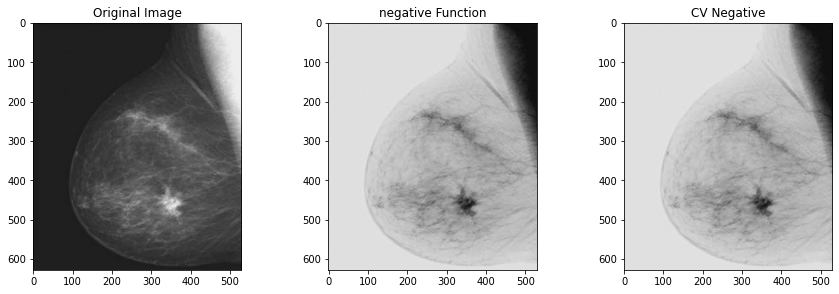

In [41]:
def negative(x):
    return (255 - 1 - x)

mamography_path = 'image_processing_tools/images/chapter03/mammography.jpg'

mamography_img = cv.imread(mamography_path)
mamography_negative = negative(mamography_img)
mamography_negative_cv = cv.bitwise_not(mamography_img)

plt.figure(figsize=(15,10))
plt.subplot(231);plt.title('Original Image');plt.imshow(mamography_img)
plt.subplot(232);plt.title('negative Function');plt.imshow(mamography_negative)
plt.subplot(233);plt.title('CV Negative');plt.imshow(mamography_negative_cv)

**Transformações Log**:

A transformação logarítmica de uma imagem é uma das transformações de imagem em nível de cinza. A transformação logarítmica de uma imagem significa substituir todos os valores de pixel, presentes na imagem, por seus valores logarítmicos. A transformação de log é usada para aprimoramento de imagem, pois expande os pixels escuros da imagem em comparação com os valores de pixel mais altos.

A fórmula para aplicar a transformação de log em uma imagem é,

S = c * log (1 + r)

onde,
*   R = input pixel value,
*   C = scaling constant and
*   S = output pixel value

O valor de 'c' é escolhido de forma que obtenhamos o valor máximo de saída correspondente ao tamanho de bit usado. Assim, a fórmula para calcular 'c' é a seguinte:

c = 255 / (log (1 + max_input_pixel_value))

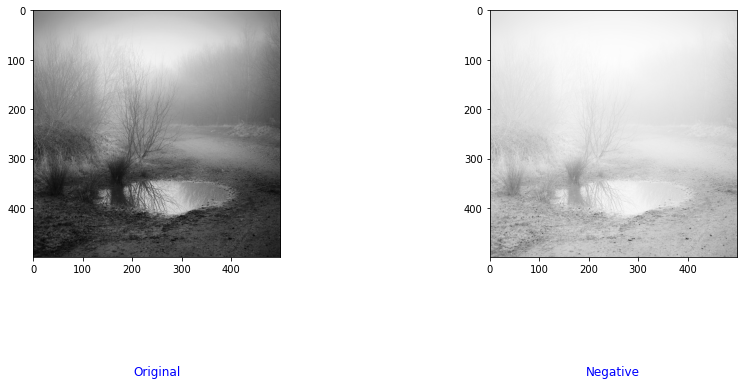

In [42]:
# Read an image
image = cv.imread('image_processing_tools/images/intro/grayView.jpg')
   
# Apply log transformation method
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(image + 1))
   
# Specify the data type so that
# float value will be converted to int
log_image = np.array(log_image, dtype = np.uint8)
   
# Display both images
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.title('Original',y=-0.5,color='b')
plt.imshow(image)


plt.subplot(2, 2, 2)
plt.title('Negative',y=-0.5,color='b')
plt.imshow(log_image)

plt.show()

<h3>Power-Law(Gamma) Transformations<h3>

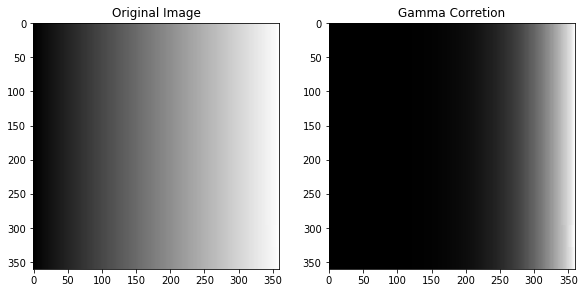

In [43]:
###Extra References###
# https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html
# https://learnopengl.com/Advanced-Lighting/Gamma-Correction

def gamma(x, gamma):
    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
        lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    y = cv.LUT(x, lookUpTable)
    return y

gamma_path = 'image_processing_tools/images/chapter03/white-black-gradient.jpg'
gamma_param = 5.0
gamma_img = cv.imread(gamma_path)
gamma_result = gamma(gamma_img, gamma_param)

plt.figure(figsize=(15,10))
plt.subplot(231);plt.title('Original Image');plt.imshow(gamma_img)
plt.subplot(232);plt.title('Gamma Corretion');plt.imshow(gamma_result)

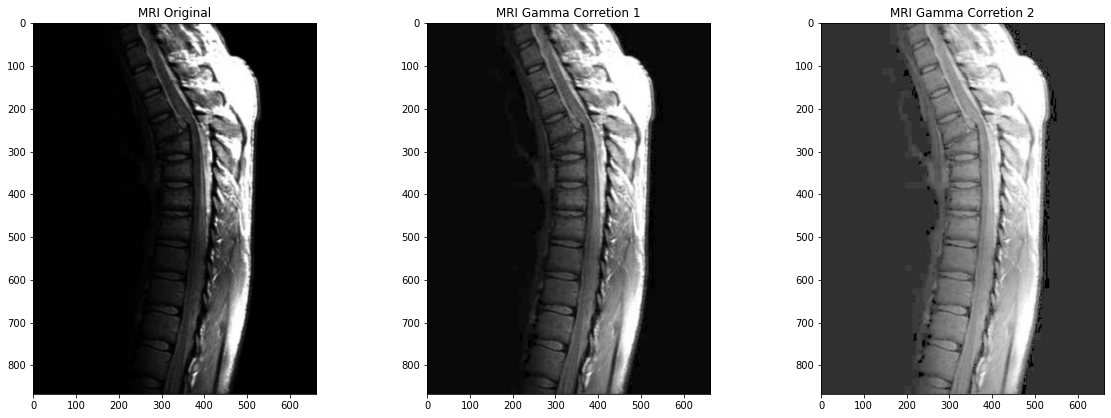

In [44]:
MRI_example_path = 'image_processing_tools/images/chapter03/mri.jpg'
gamma_param = 0.6
MRI_img = cv.imread(MRI_example_path)
MRI_result = gamma(MRI_img, gamma_param)
gamma_param = 0.3
MRI_result2 = gamma(MRI_img, gamma_param)

plt.figure(figsize=(20,15))
plt.subplot(231);plt.title('MRI Original');plt.imshow(MRI_img)
plt.subplot(232);plt.title('MRI Gamma Corretion 1');plt.imshow(MRI_result)
plt.subplot(233);plt.title('MRI Gamma Corretion 2');plt.imshow(MRI_result2)

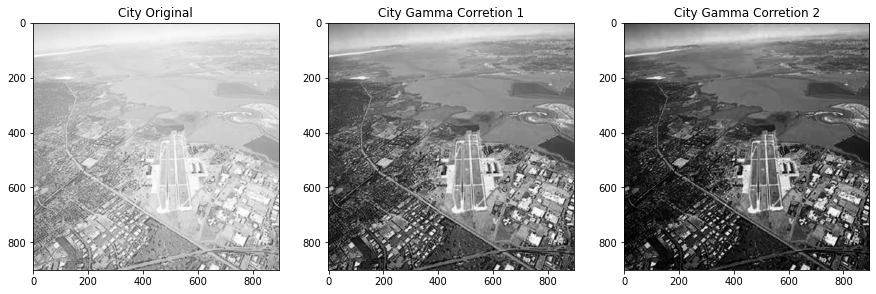

In [45]:
city_example_path = 'image_processing_tools/images/chapter03/city.jpg'
gamma_param = 3.0
city_img = cv.imread(city_example_path)
city_result = gamma(city_img, gamma_param)
gamma_param = 5.0
city_result2 = gamma(city_img, gamma_param)

plt.figure(figsize=(15,10))
plt.subplot(231);plt.title('City Original');plt.imshow(city_img)
plt.subplot(232);plt.title('City Gamma Corretion 1');plt.imshow(city_result)
plt.subplot(233);plt.title('City Gamma Corretion 2');plt.imshow(city_result2)

<h2>Histogram Processing<h2>


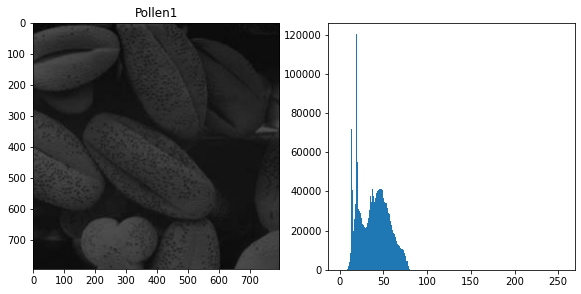

In [46]:
### References ###
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html

pollen1_path = 'image_processing_tools/images/chapter03/pollen1.jpg'
pollen2_path = 'image_processing_tools/images/chapter03/pollen2.jpg'
pollen3_path = 'image_processing_tools/images/chapter03/pollen3.jpg'
pollen4_path = 'image_processing_tools/images/chapter03/pollen4.jpg'

pollen1_img = cv.imread(pollen1_path)
pollen2_img = cv.imread(pollen2_path)
pollen3_img = cv.imread(pollen3_path)
pollen4_img = cv.imread(pollen4_path)

# Compute histogram using cv
pollen1_hist = cv.calcHist([pollen1_img],[0],None,[256],[0,256])

# Ploting with matplot
plt.figure(figsize=(15,10))
plt.subplot(231);plt.title('Pollen1');plt.imshow(pollen1_img)
plt.subplot(232);plt.hist(np.ravel(pollen1_img),256,[0,256]); plt.show()

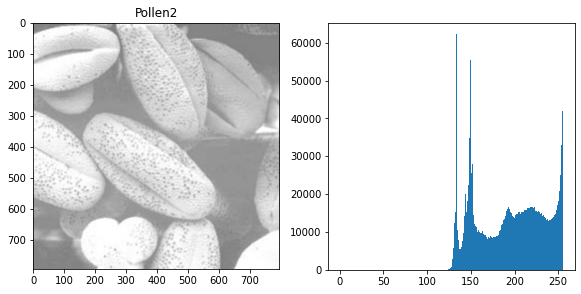

In [47]:
# Compute histogram using cv
pollen2_hist = cv.calcHist([pollen2_img],[0],None,[256],[0,256])

# Ploting with matplot
plt.figure(figsize=(15,10))
plt.subplot(231);plt.title('Pollen2');plt.imshow(pollen2_img)
plt.subplot(232);plt.hist(np.ravel(pollen2_img),256,[0,256]); plt.show()

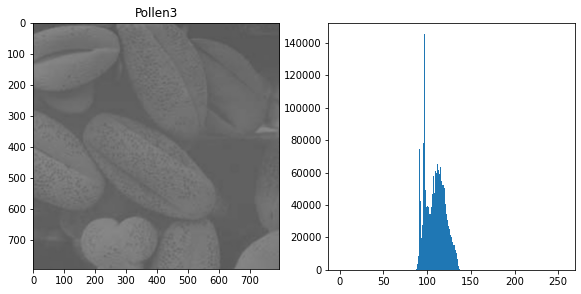

In [48]:
# Compute histogram using cv
pollen3_hist = cv.calcHist([pollen3_img],[0],None,[256],[0,256])

# Ploting with matplot
plt.figure(figsize=(15,10))
plt.subplot(231);plt.title('Pollen3');plt.imshow(pollen3_img)
plt.subplot(232);plt.hist(np.ravel(pollen3_img),256,[0,256]); plt.show()

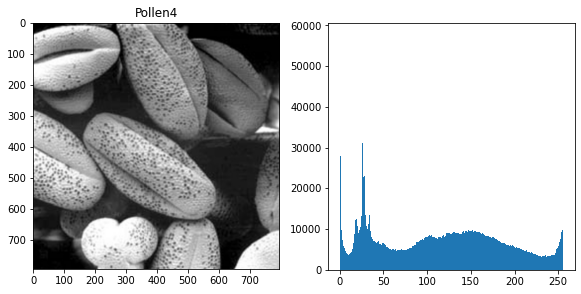

In [49]:
# Compute histogram using cv
pollen4_hist = cv.calcHist([pollen4_img],[0],None,[256],[0,256])

# Ploting with matplot
plt.figure(figsize=(15,10))
plt.subplot(231);plt.title('Pollen4');plt.imshow(pollen4_img)
plt.subplot(232);plt.hist(np.ravel(pollen4_img),256,[0,256]); plt.show()

<h3>Histogram Equalization<h3>

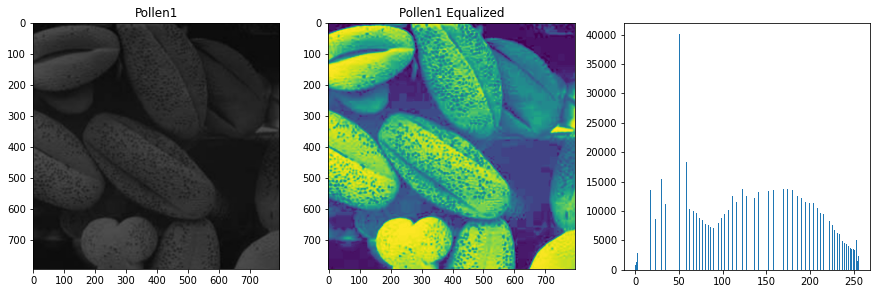

In [50]:
# Computing histogram equalization with cv
# cv.equalizeHist only works on grayscale ( 1 channel ) images
pollen1_equ = cv.equalizeHist(pollen1_img[:,:,0])

pollen1_equ_hist = cv.calcHist([pollen1_equ],[0],None,[256],[0,256])

# Ploting with matplot
plt.figure(figsize=(15,10))
plt.subplot(231);plt.title('Pollen1');plt.imshow(pollen1_img)
plt.subplot(232);plt.title('Pollen1 Equalized');plt.imshow(pollen1_equ)
plt.subplot(233);plt.hist(np.ravel(pollen1_equ),256,[0,256]); plt.show()

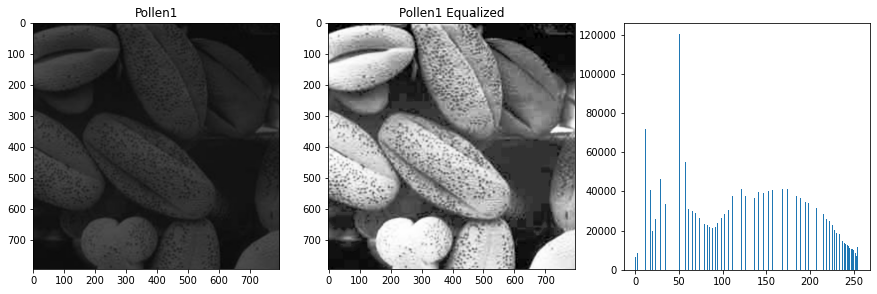

In [51]:
# Computing with numpy
def equ_histogram(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')

    img2 = cdf[img]
    return img2

pollen1_equ = equ_histogram(pollen1_img)

plt.figure(figsize=(15,10))
plt.subplot(231);plt.title('Pollen1');plt.imshow(pollen1_img)
plt.subplot(232);plt.title('Pollen1 Equalized');plt.imshow(pollen1_equ)
plt.subplot(233);plt.hist(np.ravel(pollen1_equ),256,[0,256]); plt.show()

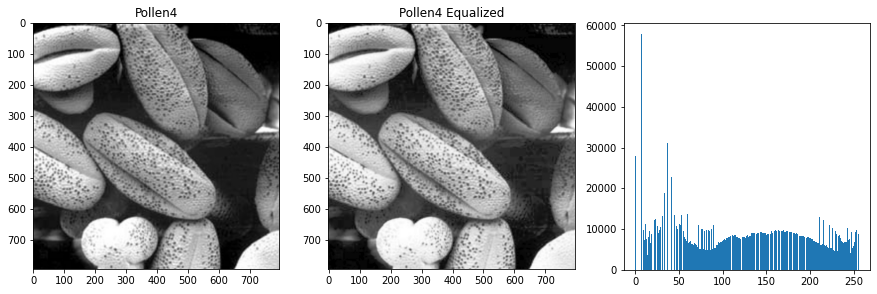

In [52]:
pollen4_equ = equ_histogram(pollen4_img)

plt.figure(figsize=(15,10))
plt.subplot(231);plt.title('Pollen4');plt.imshow(pollen4_img)
plt.subplot(232);plt.title('Pollen4 Equalized');plt.imshow(pollen4_equ)
plt.subplot(233);plt.hist(np.ravel(pollen4_equ),256,[0,256]); plt.show()

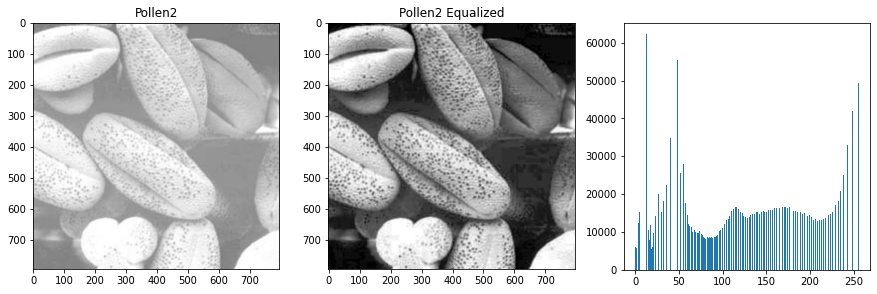

In [53]:
pollen2_equ = equ_histogram(pollen2_img)

plt.figure(figsize=(15,10))
plt.subplot(231);plt.title('Pollen2');plt.imshow(pollen2_img)
plt.subplot(232);plt.title('Pollen2 Equalized');plt.imshow(pollen2_equ)
plt.subplot(233);plt.hist(np.ravel(pollen2_equ),256,[0,256]); plt.show()

<h2> Smoothing (Lowpass) Spatial Filters<h2>

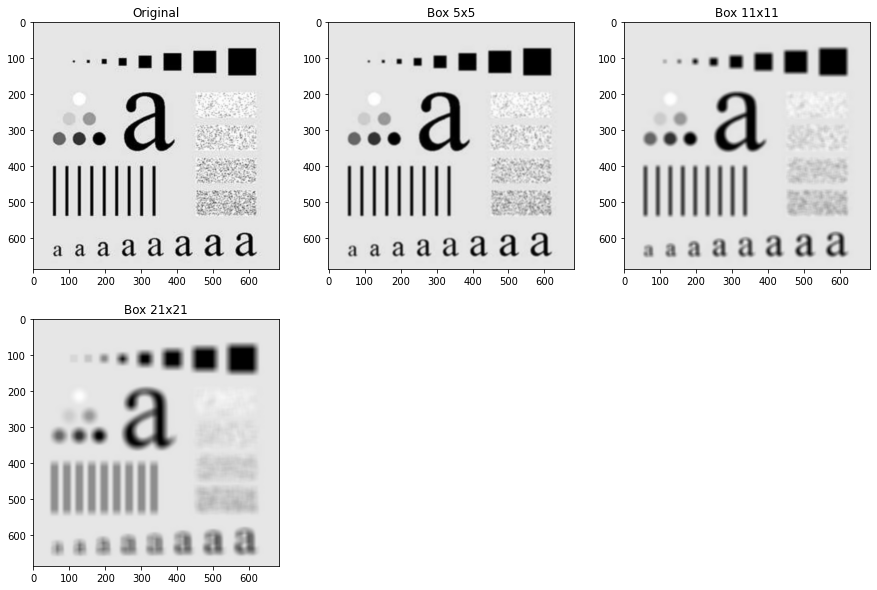

In [54]:
### References ###
# https://medium.com/@aybukeyalcinerr/correlation-vs-convolution-filtering-2711d8bb3666
# https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/
# https://docs.opencv.org/3.4/dd/d6a/tutorial_js_filtering.html
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

def box_filter(img, kernel_size):
    kernel = 1/(kernel_size**2)*np.ones((kernel_size,kernel_size))
    dst = cv.filter2D(img, -1, kernel)
    return dst

artificial1_path = 'image_processing_tools/images/chapter03/artificial.jpg'
artificial1_img = cv.imread(artificial1_path)

artificial1_box5_filtered = box_filter(artificial1_img,5)
artificial1_box11_filtered = box_filter(artificial1_img,11)
artificial1_box21_filtered = box_filter(artificial1_img,21)

plt.figure(figsize=(15,10))
plt.subplot(231);plt.title('Original');plt.imshow(artificial1_img)
plt.subplot(232);plt.title('Box 5x5');plt.imshow(artificial1_box5_filtered)
plt.subplot(233);plt.title('Box 11x11');plt.imshow(artificial1_box11_filtered)
plt.subplot(234);plt.title('Box 21x21');plt.imshow(artificial1_box21_filtered)

<h3>Lowpass Gaussian Filter Kernels<h3>

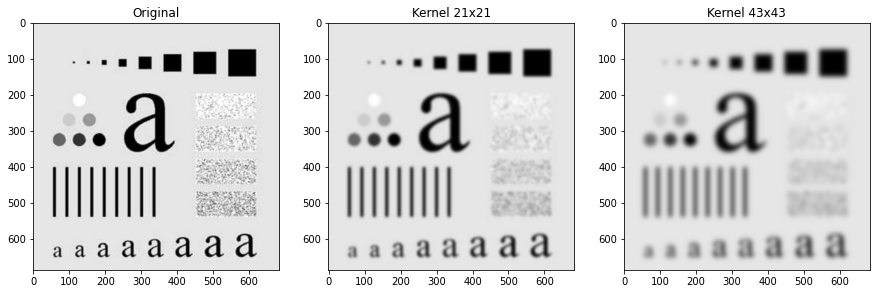

In [55]:
# We should specify the width and height of the kernel which should be positive 
# and odd. We also should specify the standard deviation in the X and Y 
# directions, sigmaX and sigmaY respectively. If only sigmaX is specified, 
# sigmaY is taken as equal to sigmaX. If both are given as zeros, they are 
# calculated from the kernel size. Gaussian filtering is highly effective in
# removing Gaussian noise from the image.

artificial1_gauss21_filtered = cv.GaussianBlur(artificial1_img,(21,21),0)
artificial1_gauss43_filtered = cv.GaussianBlur(artificial1_img,(43,43),0)

plt.figure(figsize=(15,10))
plt.subplot(231);plt.title('Original');plt.imshow(artificial1_img)
plt.subplot(232);plt.title('Kernel 21x21');plt.imshow(artificial1_gauss21_filtered)
plt.subplot(233);plt.title('Kernel 43x43');plt.imshow(artificial1_gauss43_filtered)

<h3> Sharpening (Highpass) Spatial Filters<h3>

<h4>Using the Second Derivative for Image Sharpening—the Laplacian<h4>

A função 'adjust 'realiza uma operação simples de ampliação do contraste na imagem de entrada para melhorar sua aparência visual aumentando a faixa dinâmica de seus valores de intensidade. Recebe uma imagem de entrada img e um inteiro L como argumentos. Ele retorna uma nova resolução de imagem que foi ajustada para ter uma faixa dinâmica de níveis de intensidade L.

Aqui está um detalhamento do que a função faz:

*   min_subtraction = img - np.amin(img): Isso subtrai o valor mínimo de pixel na imagem de cada valor de pixel, mudando efetivamente os valores de pixel para não negativos.

*   res = np.int8((L-1)*(min_subtraction/np.amax(min_subtraction)) + np.amax(min_subtraction)): Isso executa a operação de ajuste principal. Ele primeiro divide a imagem deslocada pelo valor máximo de pixel para dimensionar os valores de pixel para o intervalo de 0 a 1. Em seguida, multiplica essa imagem dimensionada por (L-1) para estender o intervalo dinâmico para níveis de intensidade L. Por fim, adiciona de volta o valor mínimo de pixel que foi subtraído na etapa 1 e converte a imagem resultante em uma matriz inteira de 8 bits usando np.int8().

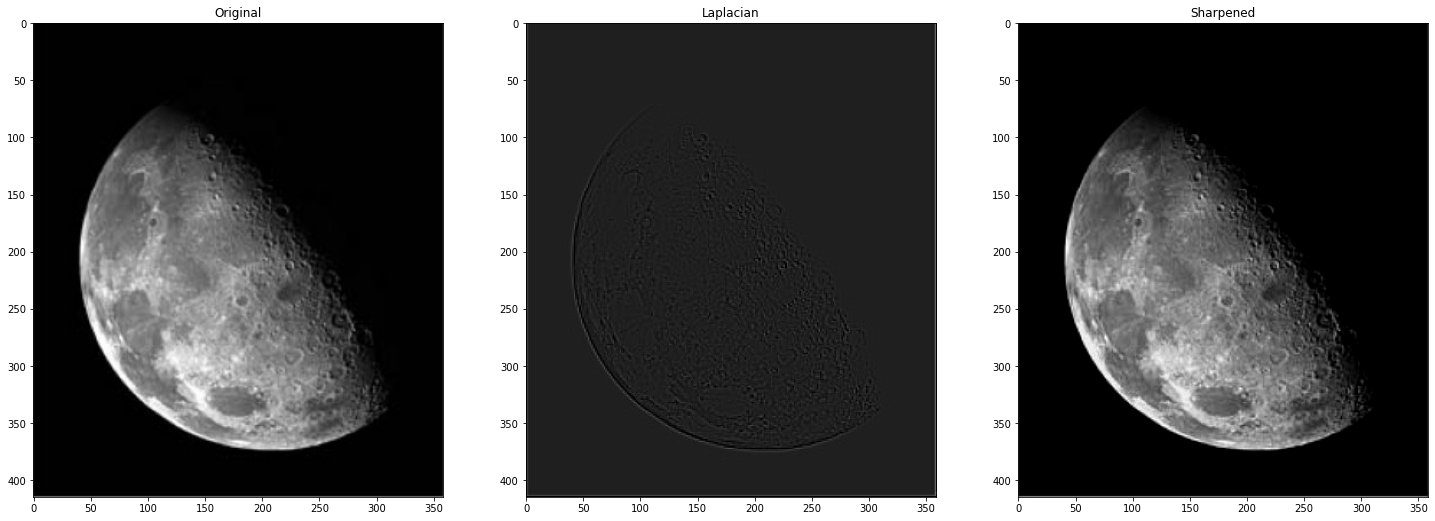

In [56]:
### References ###
# https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html

def adjust(img, L):
    min_subtraction = img - np.amin(img)
    res = np.int8((L-1)*(min_subtraction/np.amax(min_subtraction)) + np.amax(min_subtraction))
    return res

laplacian_kernelA = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])

moon_path = 'image_processing_tools/images/chapter03/moon.jpg'
moon_img = cv.imread(moon_path)

moon_laplacianA = cv.filter2D(moon_img, cv.CV_16S, laplacian_kernelA)
moon_laplacianA = adjust(moon_laplacianA, 256)

# Using c = 0.5
sharp = moon_img - moon_laplacianA//2

plt.figure(figsize=(25,30))
plt.subplot(231);plt.title('Original');plt.imshow(moon_img)
plt.subplot(232);plt.title('Laplacian');plt.imshow(moon_laplacianA)
plt.subplot(233);plt.title('Sharpened');plt.imshow(sharp)


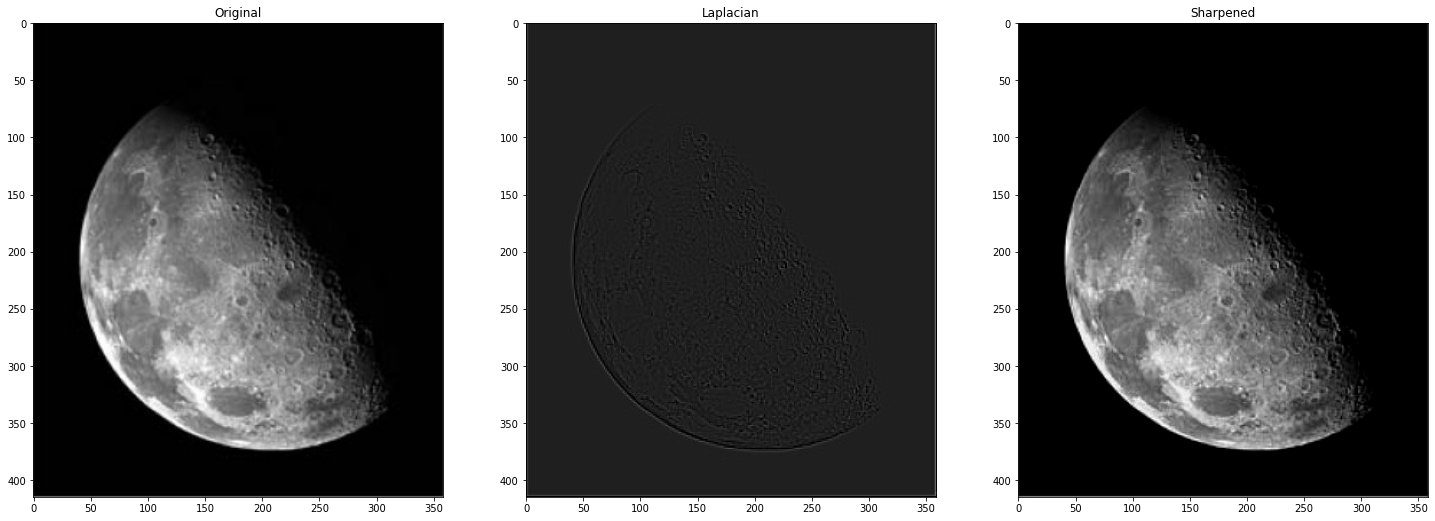

In [57]:
# Using cv Laplacian function
moon_laplacianB = cv.Laplacian(moon_img, cv.CV_16S, ksize=1)
moon_laplacianB = adjust(moon_laplacianB, 256)

# Using c = 0.5
sharp = moon_img - moon_laplacianB//2

plt.figure(figsize=(25,30))
plt.subplot(231);plt.title('Original');plt.imshow(moon_img)
plt.subplot(232);plt.title('Laplacian');plt.imshow(moon_laplacianB)
plt.subplot(233);plt.title('Sharpened');plt.imshow(sharp)